In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint
import warnings
warnings.filterwarnings('ignore')

In [35]:
with rasterio.open('./snowmelt_data/data/scene_30m_mask.tif') as raster:
    mask = raster.read(1)

dates_2015 = ['0217_18', '0305_06', '0325', '0403', '0409', '0415', '0427', '0501', '0528', '0608']
data_matrices = []

for date in dates_2015:
    with rasterio.open(f"./snowmelt_data/data/2015_snow_depth/TB2015{date}_SUPERsnow_depth.tif_mean30m.tif") as raster:
        data_matrices.append(raster.read(1)*mask)

#Replace nan with 0
data_matrices = np.nan_to_num(data_matrices)

diffs = np.diff(data_matrices, axis = 0)
print(len(diffs[abs(diffs)<0.001]))
diffs[abs(diffs) < 0.001] = np.nan
print(len(diffs[abs(diffs)<0.001]))

19812985
0


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

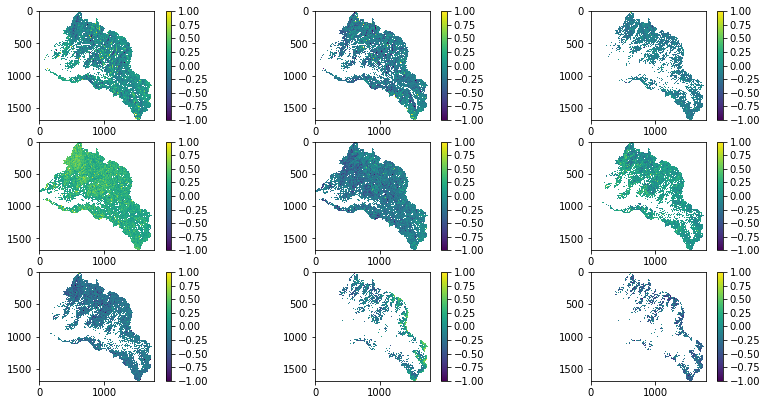

In [3]:
plt.figure(figsize=(14,14))
plot_number = 1
for matrix in diffs:
    ax = plt.subplot(6,3, plot_number)
    plt.imshow(matrix, vmin = -1, vmax = 1)
    plot_number = plot_number + 1
    plt.colorbar()
    
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

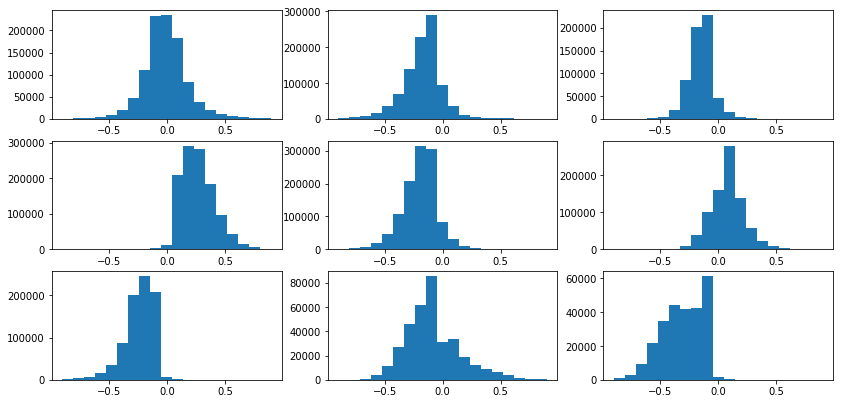

In [4]:
plt.figure(figsize=(14,14))
plot_number = 1
for matrix in diffs:
    ax = plt.subplot(6,3, plot_number)
    matrix = matrix[~np.isnan(matrix)]
    matrix = matrix.ravel()
    bins = np.linspace(-.9,.9,20)
    plt.hist(matrix, bins = bins)
    plot_number = plot_number + 1
    
plt.tight_layout

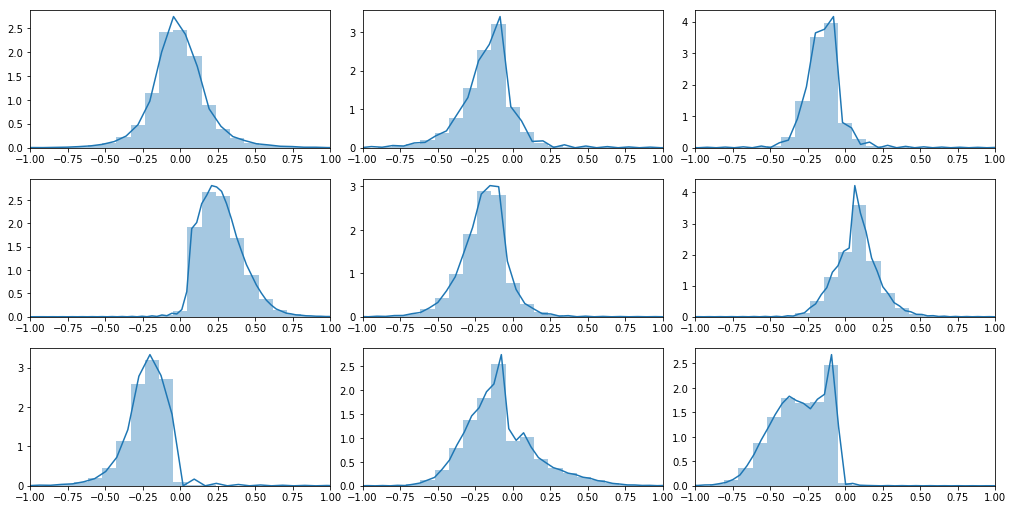

In [5]:
import seaborn as sns

plt.figure(figsize=(14,14))
plot_number = 1
for matrix in diffs:
    ax = plt.subplot(6,3, plot_number)
    matrix = matrix[~np.isnan(matrix)]
    matrix = matrix.ravel()
# Make default histogram of sepal length
    bins = np.linspace(-.9, .9, 20)
    sns.distplot(matrix, bins = bins)
    plt.xlim((-1, 1))
    plot_number = plot_number + 1
     
plt.tight_layout()

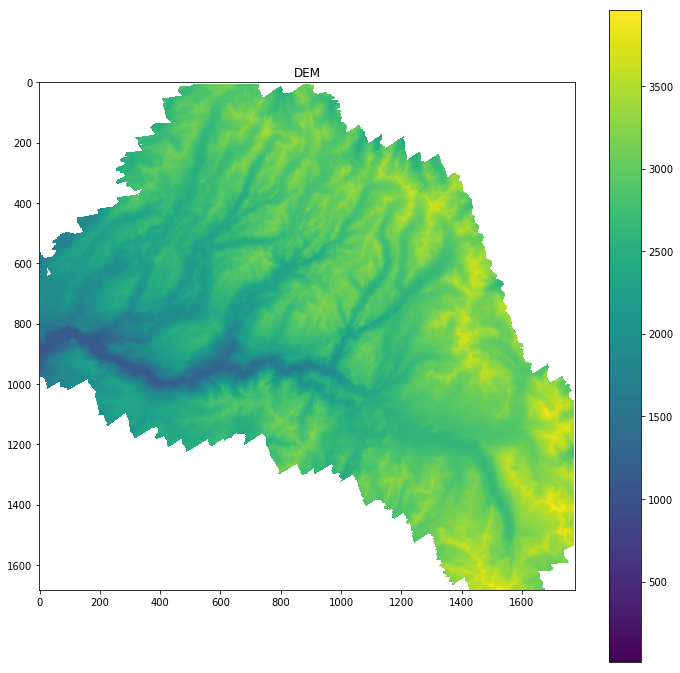

In [6]:
with rasterio.open('./snowmelt_data/data/dem30m.tif') as raster:
    dem = raster.read(1, out_shape = (1, raster.height, raster.width))
    plt.figure(figsize = (12,12))
    plt.imshow(dem)
    plt.colorbar()
    plt.title('DEM')

In [7]:
band_1 = ((dem>600) & (dem <2000))*mask
band_1[band_1==False]=np.nan
band_2 = ((dem>=2000) & (dem <2300))*mask
band_2[band_2==False]=np.nan
band_3 = ((dem>=2300) & (dem <2600))*mask
band_3[band_3==False]=np.nan
band_4 = ((dem>=2900) & (dem <3200))*mask
band_4[band_4==False]=np.nan
band_5 = ((dem>=3200) & (dem <3500))*mask
band_5[band_5==False]=np.nan
band_6 = ((dem>=3500) & (dem <3800))*mask
band_6[band_6==False]=np.nan
band_7 = ((dem>=3800) & (dem <4100))*mask
band_7[band_7==False]=np.nan

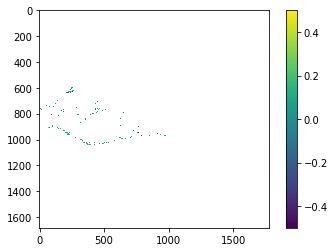

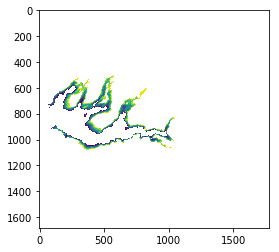

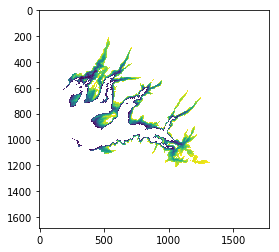

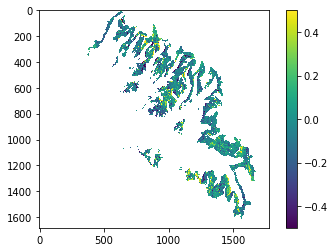

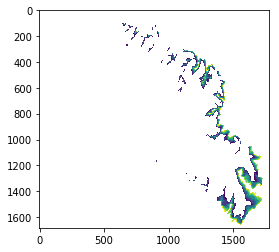

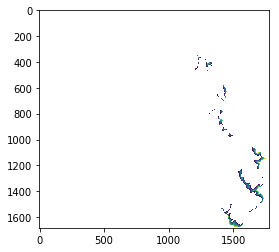

In [8]:
plt.imshow(band_1*diffs[0], vmin = -.5, vmax = 0.5)
plt.colorbar()
plt.show()
plt.imshow(dem*band_2)
plt.show()
plt.imshow(dem*band_3)
plt.show()
plt.imshow(diffs[0]*band_4, vmin = -.5, vmax = 0.5)
plt.colorbar()
plt.show()
plt.imshow(dem*band_5)
plt.show()
plt.imshow(dem*band_6)
plt.show()


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

(9, 1684, 1777)


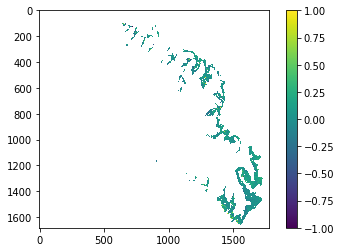

In [9]:
band_5[band_5==False]=np.nan
plt.imshow(band_5*diffs[0], vmin = -1, vmax = 1)
plt.colorbar()
display(band_5*diffs[0])
print(diffs.shape)

(array([1.20000e+01, 0.00000e+00, 1.37330e+04, 4.02760e+04, 1.05350e+05,
        2.15087e+05, 4.68392e+05, 6.86677e+05, 2.58675e+05, 3.24200e+04]),
 array([  10.9125061 ,  405.81678772,  800.72106934, 1195.62535095,
        1590.52963257, 1985.43391418, 2380.3381958 , 2775.24247742,
        3170.14675903, 3565.05104065, 3959.95532227]),
 <a list of 10 Patch objects>)

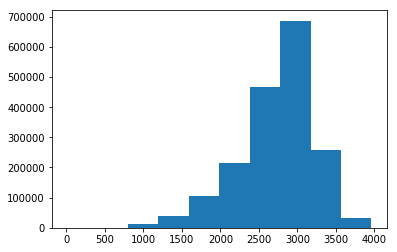

In [10]:
heights = dem[~np.isnan(dem)]
heights = heights.ravel()
plt.hist(heights)

(-1, 1)

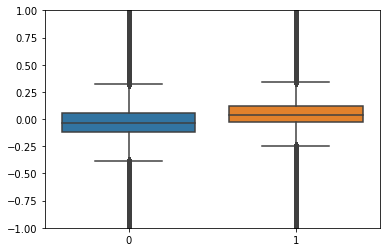

In [11]:
flat_band_5 = band_5*diffs[0]
flat_band_5 = flat_band_5.ravel()
flat_band_4 = band_4*diffs[0]
flat_band_4 = flat_band_4.ravel()
flat_band_4 = np.asarray(flat_band_4)
sns.boxplot(data=[flat_band_4,flat_band_5], orient = 'v')
plt.ylim((-1,1))


(-1, 1)

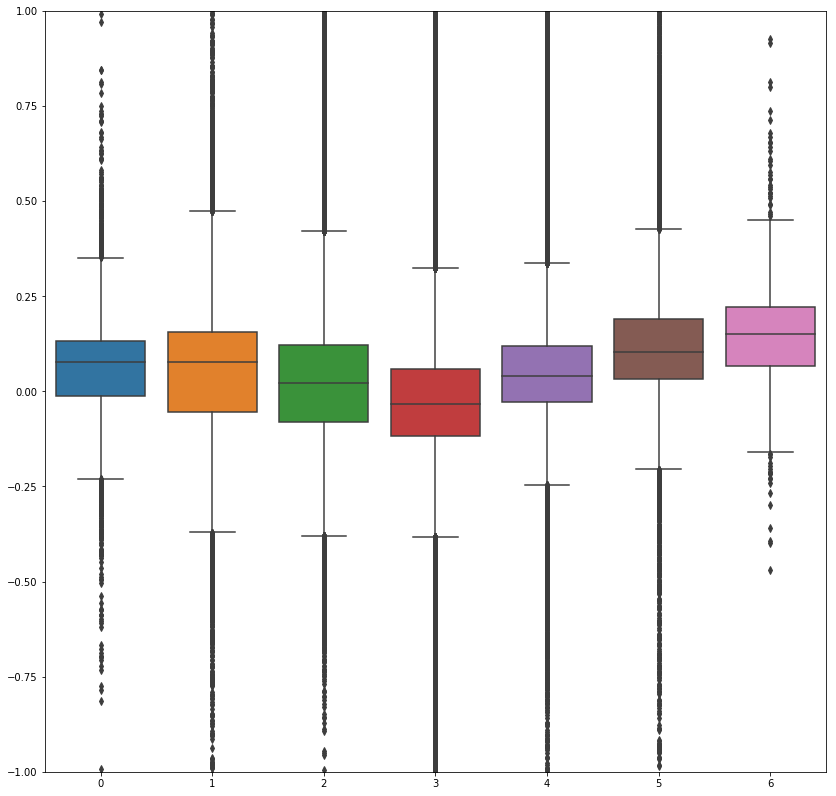

In [12]:
flat_band_1 = band_1*diffs[0]
flat_band_1 = flat_band_1.ravel()
flat_band_2 = band_2*diffs[0]
flat_band_2 = flat_band_2.ravel()
flat_band_3 = band_3*diffs[0]
flat_band_3 = flat_band_3.ravel()
flat_band_4 = band_4*diffs[0]
flat_band_4 = flat_band_4.ravel()
flat_band_5 = band_5*diffs[0]
flat_band_5 = flat_band_5.ravel()
flat_band_6 = band_6*diffs[0]
flat_band_6 = flat_band_6.ravel()
flat_band_7 = band_7*diffs[0]
flat_band_7 = flat_band_7.ravel()

#sns.boxplot(flat_band_5, orient = 'v')
#plt.ylim((-1,1))
x = [flat_band_1, flat_band_2, flat_band_3, flat_band_4, flat_band_5, flat_band_6, flat_band_7]

plt.figure(figsize = (14,14))
sns.boxplot(data=x, orient = 'v')
plt.ylim((-1,1))

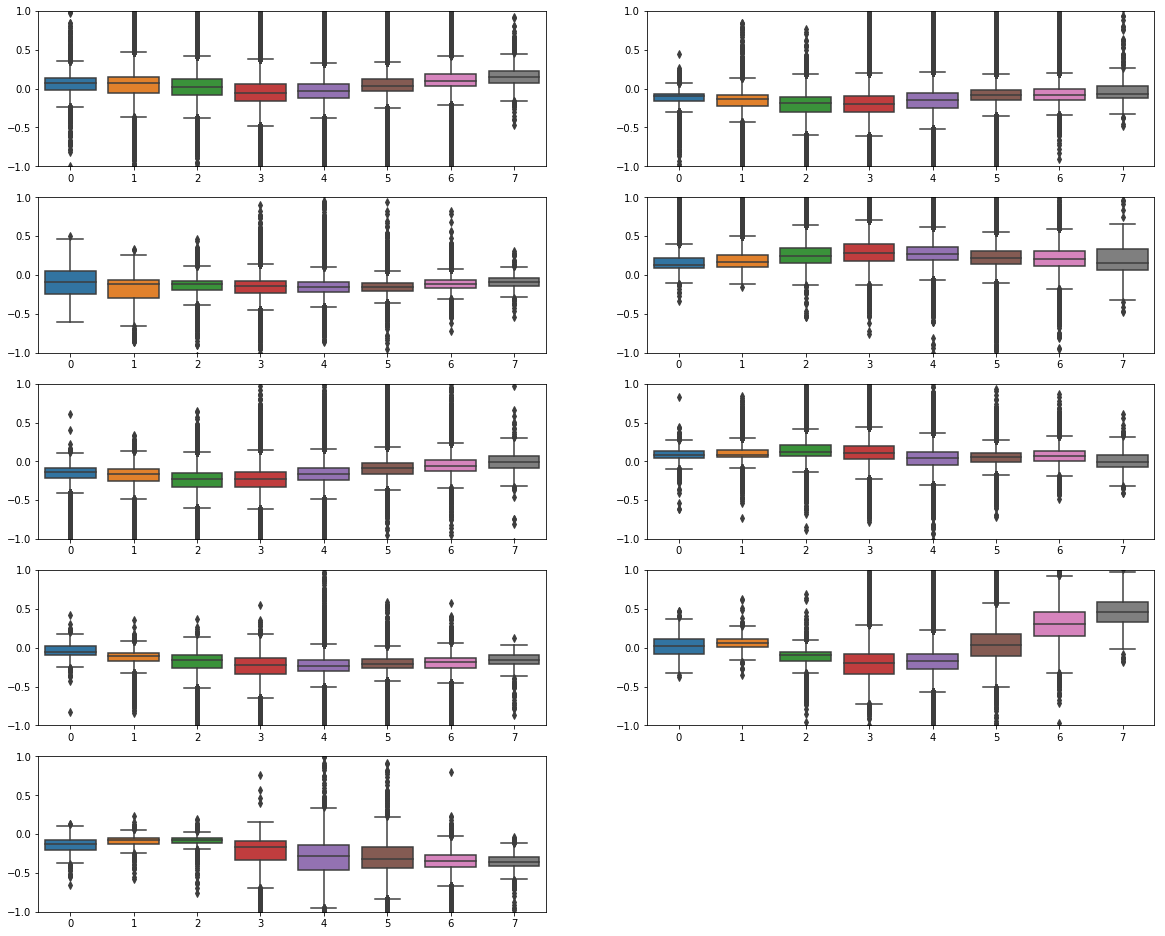

In [13]:
with rasterio.open('./snowmelt_data/data/dem30m.tif') as raster:
    dem = raster.read(1)*mask

bands = [(600,2000), (2000,2300), (2300, 2600), (2600, 2900), (2900, 3200), (3200, 3500), (3500, 3800), (3800, 4100)]
band_masks = []

for x,y in bands:
    band = ((dem>x) & (dem<y))*mask
    band[band==False]=np.nan
    band_masks.append(band)
    
plt.figure(figsize=(20,20))
plot_number = 1
bands = np.array(band_masks)
for period in diffs:
    data = bands * period
    for_plotting = []
    for d in data:
        for_plotting.append(d.ravel())
        
    ax = plt.subplot(6,2, plot_number)
    sns.boxplot(data=for_plotting, orient='v')
    plt.ylim((-1,1))
    plot_number = plot_number + 1


In [18]:
from scipy import stats

Text(0,0.5,'')

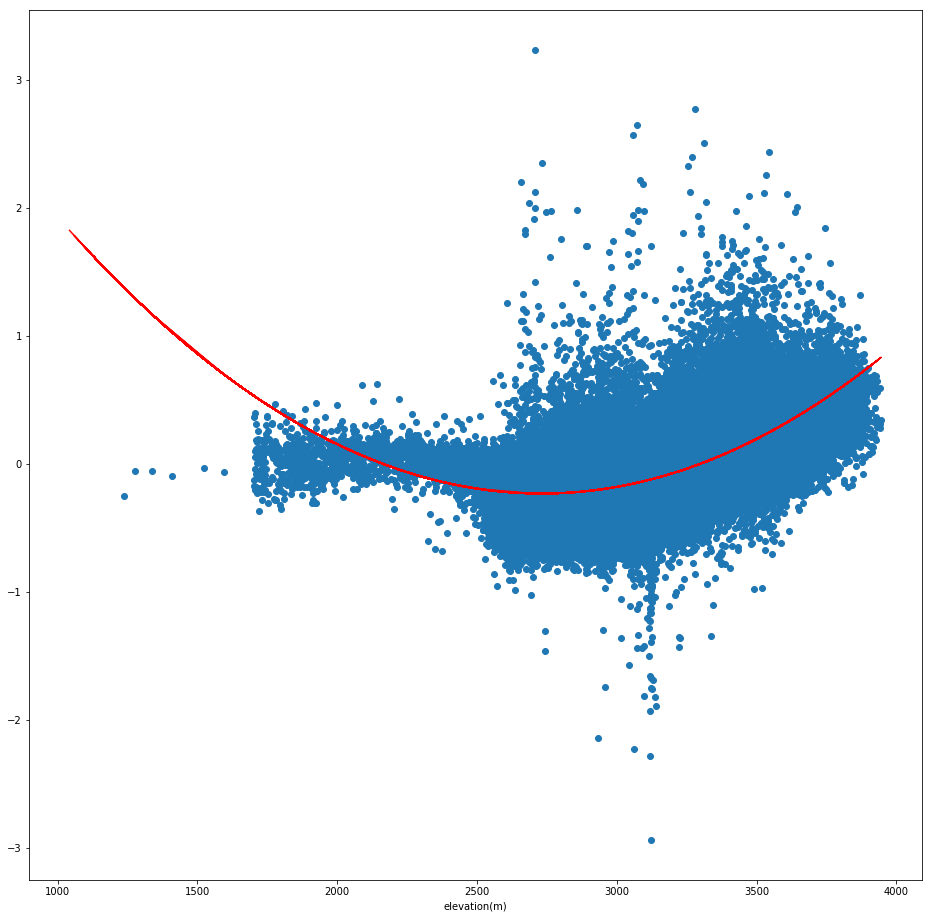

In [95]:
ydiffs = diffs[-2].ravel()
elevation = dem.ravel()
slope, intercept, rvalue, pvalue, stdError = stats.linregress(elevation[~np.isnan(ydiffs)], ydiffs[~np.isnan(ydiffs)])
plt.figure(figsize = (16, 16))
plt.scatter(elevation, ydiffs)
p  = np.polyfit(elevation[~np.isnan(ydiffs)], ydiffs[~np.isnan(ydiffs)], 2)
c1, c2, c3 = p[0], p[1], p[2]
plt.plot(elevation,c1*elevation**2+c2*elevation+c3,color ='red' )
plt.xlabel("elevation(m)")
plt.ylabel("")



In [92]:
print(rvalue**2)
print(slope)
print ('coeffs = ', p)

0.32753030607506045
0.0005549323394406361
coeffs =  [ 7.21658102e-07 -3.94118258e-03  5.14706652e+00]


In [48]:
with rasterio.open('./snowmelt_data/aspect30m.tif') as raster:
    aspect_map = raster.read(1)*mask

In [109]:
ydiffs = diffs[0].ravel()
asp = aspect_map.ravel()
#asp = 0.5*(1.0 - np.cos(asp*np.pi/180-np.pi/4))
p  = np.polyfit(elevation[~np.isnan(ydiffs)], ydiffs[~np.isnan(ydiffs)], 2)
c1, c2, c3 = p[0], p[1], p[2]
slope, intercept, rvalue, pvalue, stdError = stats.linregress(asp[~np.isnan(ydiffs)&~np.isnan(asp)], ydiffs[~np.isnan(asp)&~np.isnan(ydiffs)])
plt.figure(figsize = (16, 16))
plt.scatter(asp, ydiffs)
plt.plot(asp, slope*asp+intercept, color = 'red')
plt.plot(asp, c1*asp**2+c2*asp+c3, color = 'green')
plt.xlabel("aspect")
plt.ylabel("change in snow depth (m)")

print(p)


[ 2.58421253e-07 -1.45521566e-03  2.01282674e+00]
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1211f7158> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1152x1152 with 1 Axes>

In [73]:
print(rvalue**2)
print(stdError)
print('pvalue = ',pvalue)

1.7621940092872664e-05
0.0006145141411208794
pvalue =  4.0485438438459186e-05


In [78]:
plt.hist2d?